In [17]:
import wisardpkg as wp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


In [8]:
MNIST = fetch_openml('mnist_784', version=1, as_frame=False)

X = MNIST.data
y = MNIST.target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

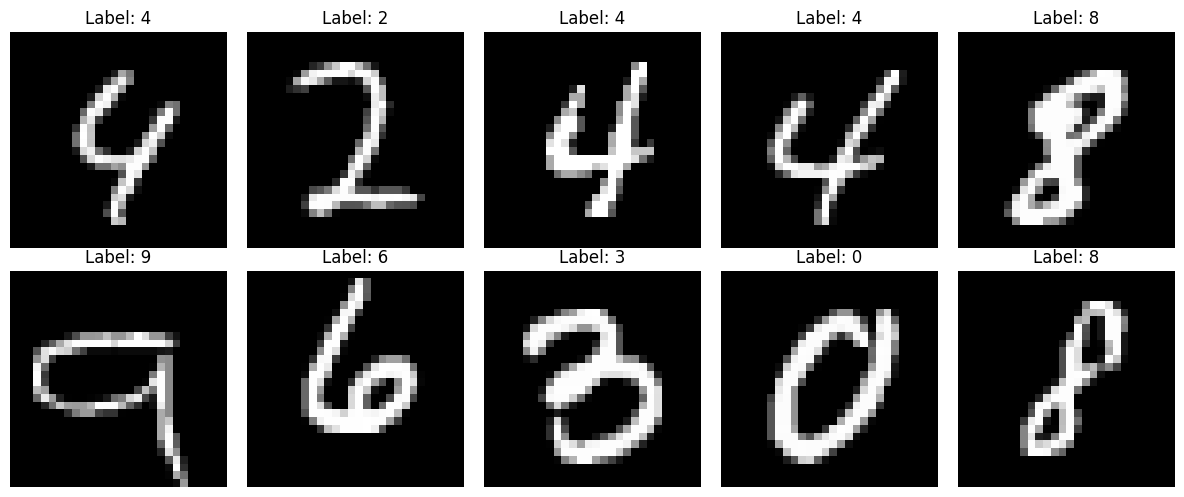

In [31]:
indices = np.random.choice(len(X), 10, replace=False)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for ax, idx in zip(axes.flatten(), indices):
    ax.imshow(X[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [18]:
kc = wp.KernelCanvas(784, 10, bitsByKernel=3, activationDegree=0.07, useDirection=False)

In [25]:
type(X[0])

numpy.ndarray

In [ ]:
X_reshaped = X.reshape(-1, 28, 28)
X_reshaped[0].shape


(28, 28)

In [75]:
from collections import defaultdict

class RandomKernelCanvas():
    def __init__(self, shape : tuple, numberOfKernels : int, bitsByKernel : int = 3, activationDegree : float = 0.07):
        self.numberOfKernels = numberOfKernels
        self.bitsByKernel = bitsByKernel
        self.activationDegree = activationDegree
        self.shape = shape
        
        self.makeKernel()
        
    def squareDistance(self, x, y):
        return np.sum(np.pow(x - y, 2))
        
    def makeKernel(self):
        points = np.random.choice(np.prod(self.shape), size=self.numberOfKernels, replace=False)
        self.kernel_points = [(point // self.shape[1], point % self.shape[1]) for point in points]
        
    def showKernelPoints(self):
        canvas = np.ones((*self.shape, 3))  # All white squares, RGB

        # Paint the kernel points red
        for row, col in self.kernel_points:
            canvas[row, col] = [1, 0, 0]  # Red color (R=1, G=0, B=0)

        fig, ax = plt.subplots()
        ax.imshow(canvas, vmin=0, vmax=1)
        plt.show()
        
    def findClosestKernel(self, x):
        distances = [self.squareDistance(x, np.array(self.kernel_points[i])) for i in range(self.numberOfKernels)]
        return np.argmin(distances)
        
    def showCanvas(self):
        canvas = np.ones((*self.shape, 3))  # All white squares, RGB

        # Paint the kernel points red
        for row, col in self.kernel_points:
            canvas[row, col] = [1, 0, 0]  # Red color (R=1, G=0, B=0)
        
        fig, ax = plt.subplots()
        ax.imshow(canvas, vmin=0, vmax=1)
        
         # Add numbers to each square
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                ax.text(j, i, str(self.findClosestKernel((i, j))), 
                        va='center', ha='center', color='black', fontsize=6)

        plt.show()

In [76]:
tst = RandomKernelCanvas((28, 28), 10, bitsByKernel=3, activationDegree=0.07)
tst.kernel_points

[(np.int64(13), np.int64(22)),
 (np.int64(16), np.int64(21)),
 (np.int64(11), np.int64(12)),
 (np.int64(26), np.int64(16)),
 (np.int64(4), np.int64(23)),
 (np.int64(3), np.int64(23)),
 (np.int64(16), np.int64(10)),
 (np.int64(18), np.int64(10)),
 (np.int64(4), np.int64(22)),
 (np.int64(10), np.int64(10))]

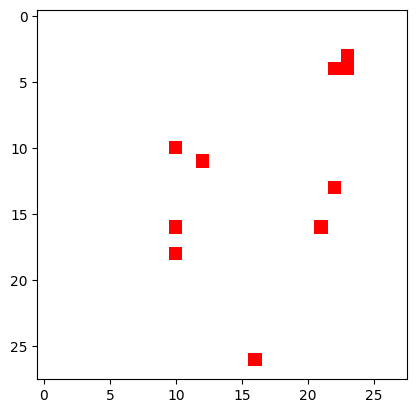

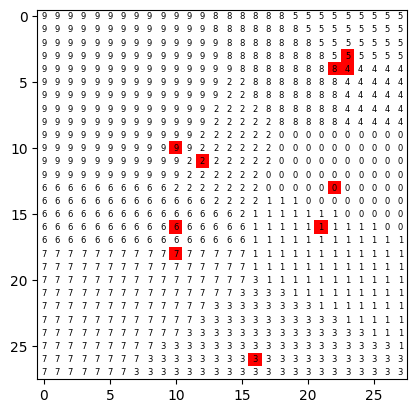

In [77]:
tst.showKernelPoints()
tst.showCanvas()